# fSSE & DcfE Comparison

以单自由度系统为例，比较fSSE与DcfE两种离散化方法。

## 1. 无额外时滞

已处理好的动力学方程为

$$
x'' = - p x_{N} - d x'_{N}, \qquad T \in (N, N + 1)
$$

### 1.1 fSSE结果

系统的动力学方程为

$$
\frac{d}{dT} \begin{pmatrix}
    x \\ x'
\end{pmatrix} = \begin{bmatrix}
    0 & 1 \\
    0 & 0
\end{bmatrix} \begin{pmatrix} x \\ x' \end{pmatrix} + \begin{bmatrix}
    0 & 0 \\
    - p & - d
\end{bmatrix} \left. \begin{pmatrix} x \\ x' \end{pmatrix} \right |_{T = n},
\qquad T \in (N, N + 1)
$$

可以解得

$$
\left. \begin{pmatrix} x \\ x' \end{pmatrix} \right |_{T = n + 1} = \begin{bmatrix}
    1 - \frac{p}{2} & 1 - \frac{d}{2} \\
    - p & 1 - d
\end{bmatrix} \left. \begin{pmatrix} x \\ x' \end{pmatrix} \right |_{T = n}
$$

要求矩阵

$$
A_{1} = \begin{bmatrix}
    1 - \frac{p}{2} & 1 - \frac{d}{2} \\
    - p & 1 - d
\end{bmatrix}
$$

的特征值在复平面上的单位圆内。它的特征方程为

$$
\begin{aligned}
    \begin{vmatrix}
        1 - \frac{p}{2} - \lambda & 1 - \frac{d}{2} \\
        - p & 1 - d - \lambda
    \end{vmatrix} &= 0 \\
    \lambda^{2} + \bigg(\frac{p}{2} + d - 2 \bigg) \lambda + \bigg(\frac{p}{2} - d + 1 \bigg) &= 0
\end{aligned}
$$

代入$\lambda = \frac{\sigma + 1}{\sigma - 1}$，使得特征方程变为关于$\sigma$的多项式方程，要求根$\sigma$的实部小于0：

$$
p \sigma^{2} + (- p + 2 d) \sigma +(- 2 d + 4) = 0
$$

要求

$$
\begin{aligned}
    \frac{- p + 2 d}{p} &> 0 \\
    - p^{2} + 2 p d &> 0
\end{aligned}
$$

### 1.2 DcfE结果

系统的运动方程为：

$$
\begin{aligned}
    \left. x \right |_{N+1} &= \left. x \right |_{N} + \left. x' \right |_{N} + \frac{1}{2} \left. x'' \right |_{N} \\
    \left. x' \right |_{N+1} &= \left. x' \right |_{N} + \left. x'' \right |_{N} \\
    \left. x'' \right |_{N+1} &= - p \left. x \right |_{N+1} - d \left. x' \right |_{N+1} \\
    &= (- p) \left. x \right |_{N} + (- p - d) \left. x' \right |_{N} + \bigg(- \frac{p}{2} - d \bigg) \left. x'' \right |_{N}
\end{aligned}
$$

进而得到：

$$
\left. \begin{pmatrix} x \\ x' \\ x'' \end{pmatrix} \right |_{N + 1} =
\begin{bmatrix}
    1 & 1 & \frac{1}{2} \\
    0 & 1 & 1 \\
    - p & - p - d & -\frac{p}{2} - d
\end{bmatrix}
\left. \begin{pmatrix} x \\ x' \\ x'' \end{pmatrix} \right |_{N}
$$

要求矩阵

$$
A_{2} = \begin{bmatrix}
    1 & 1 & \frac{1}{2} \\
    0 & 1 & 1 \\
    - p & - p - d & -\frac{p}{2} - d
\end{bmatrix}
$$

的特征值在复平面上的单位圆内。它的特征方程为

$$
\begin{aligned}
    \begin{vmatrix}
        1 - \lambda & 1 & \frac{1}{2} \\
        0 & 1 - \lambda & 1 \\
        - p & - p - d & -\frac{p}{2} - d - \lambda
    \end{vmatrix} &= 0 \\
    \lambda^{3} + (-\frac{p}{2} - d + 2) \lambda^2 + (-\frac{p}{2} + d - 1) \lambda &= 0
\end{aligned}
$$

代入$\lambda = \frac{\sigma + 1}{\sigma - 1}$，使得特征方程变为关于$\sigma$的多项式方程，要求根$\sigma$的实部小于0：

$$
p \sigma^{3} + 2 d \sigma^{2} + (-p + 4) \sigma + (- 2 d + 4) = 0
$$

令

$$
a_{0} = - 2 d + 4, a_{1} = - p + 4, a_{2} = 2 d, a_{3} = p.
$$

要求

$$
\begin{aligned}
    a_{3} > 0 & \Leftrightarrow && p > 0 \\
    a_{2} > 0 & \Leftrightarrow && 2 d > 0 \\
    a_{1} > 0 & \Leftrightarrow && - p + 4 > 0 \\
    a_{0} > 0 & \Leftrightarrow && - 2 d + 4 > 0 \\
    H_{2} = a_{1} a_{2} - a_{0} a_{3} > 0 & \Leftrightarrow && - 4 p + 8 d > 0
\end{aligned}
$$

可见，fSSE与DcfE求解得到的稳定性条件不同。


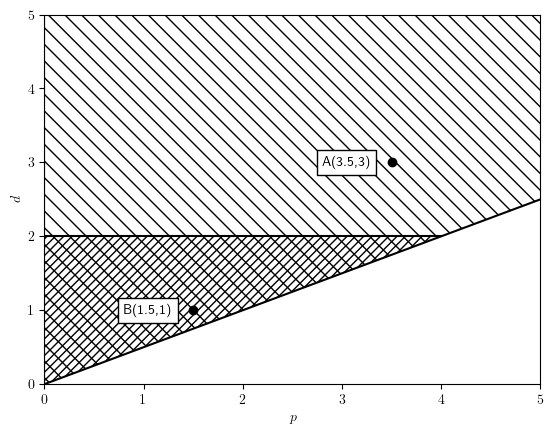

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

# 作fSSE与DcfE稳定性区域对比
p = np.linspace(0, 5, 1000)
d = np.linspace(0, 5, 1000)

P, D = np.meshgrid(p, d)

expression = -(P**2) + 2 * P * D
condition1 = (P > 0) & (D > 0) & (expression > 0)
condition2 = (P > 0) & (D > 0) & (-P + 4 > 0) & (-2 * D + 4 > 0) & (-4 * P + 8 * D > 0)

mpl.rcParams["text.usetex"] = True  # 默认为false，此处设置为TRUE
fig1, ax1 = plt.subplots()

ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
ax1.set_xlabel(r"$p$")
ax1.set_ylabel(r"$d$")

ax1.contourf(P, D, condition1, colors=["None", "None"], hatches=[None, "\\\\"])
ax1.contourf(P, D, condition2, colors=["None", "None"], hatches=[None, "////"])
ax1.plot(np.array([0, 5]), np.array([0, 2.5]), "k")
ax1.plot(np.array([0, 4]), np.array([2, 2]), "k")
ax1.plot(np.array([0, 0]), np.array([0, 5]), "k")

ax1.scatter(np.array([1.5, 3.5]), np.array([1, 3]), c=["k"])
ax1.annotate(
    r"A(3.5,3)",
    (2.8, 2.95),
    bbox=dict(fc="white", ec="k", lw=1, alpha=1),
)
ax1.annotate(
    r"B(1.5,1)",
    (0.8, 0.95),
    bbox=dict(fc="white", ec="k", lw=1, alpha=1),
)

plt.show()


定义状态空间方程与基于数字采样信号的控制力


In [17]:
def StateSpaceEquations(theta, t, inputforce):
    # 定义状态空间方程
    _, x_prime = theta
    return [x_prime, inputforce]


def InputForce(theta_digital, p, d):
    # 计算控制力
    x, x_prime = theta_digital
    return -p * x - d * x_prime


定义ODE求解混杂系统函数


In [18]:
def Get_Snapshot(Timespan, Gain, InitialCondition):
    theta_digital = InitialCondition  # 初始化时滞量
    theta_total = np.asarray(InitialCondition).reshape((1, -1))  # 初始化全时程的状态量
    theta_integer = np.asarray(InitialCondition).reshape((1, -1))  # 初始化整数倍采样周期处的状态量

    for i in range(int(Timespan)):
        # [0,1]区间用0时刻的，后面[i,i+1]区间都用i时刻的，如[2,3]用2的，[1,2]用1的
        theta_digital = theta_integer[i, :].tolist()

        theta_temp = odeint(
            StateSpaceEquations,
            InitialCondition,
            np.linspace(i, i + 1, 101),
            args=(InputForce(theta_digital, Gain[0], Gain[1]),),
        )

        theta_total = np.concatenate((theta_total, theta_temp[1:, :]), axis=0)
        InitialCondition = theta_temp[-1, :].tolist()

        theta_integer = np.concatenate(
            (theta_integer, theta_temp[-1, :].reshape((1, -1))), axis=0
        )

    return theta_total, theta_integer


选取增益组合$(1.5,1)$与$(3.5,3)$，看fSSE与DcfE得到稳定性条件的准确性


In [22]:
TotalTime = 10
InitialState = (
    10
    * np.random.rand(
        2,
    )
).tolist()

GainSetA = (3.5, 3)
GainSetB = (1.5, 1)


定义离散映射矩阵的函数，并计算$T \in \mathbb{Z}^{+}$时的状态量


In [23]:
def MappingMatrix(GainSet):
    # Use fSSE
    return np.array(
        [[1 - GainSet[0] / 2, 1 - GainSet[1] / 2], [-GainSet[0], 1 - GainSet[1]]]
    )


theta_integer_GainSetA = np.array(InitialState).reshape(1, -1)
theta_integer_GainSetB = np.array(InitialState).reshape(1, -1)

Mapping_GainSetA = MappingMatrix(GainSetA)
Mapping_GainSetB = MappingMatrix(GainSetB)

for _ in np.arange(1, TotalTime + 1, 1):
    theta_integer_GainSetA = np.concatenate(
        (
            theta_integer_GainSetA,
            (Mapping_GainSetA @ theta_integer_GainSetA[-1, :].reshape((-1, 1))).T,
        ),
        axis=0,
    )
    theta_integer_GainSetB = np.concatenate(
        (
            theta_integer_GainSetB,
            (Mapping_GainSetB @ theta_integer_GainSetB[-1, :].reshape((-1, 1))).T,
        ),
        axis=0,
    )


计算两种增益组合对应的时程


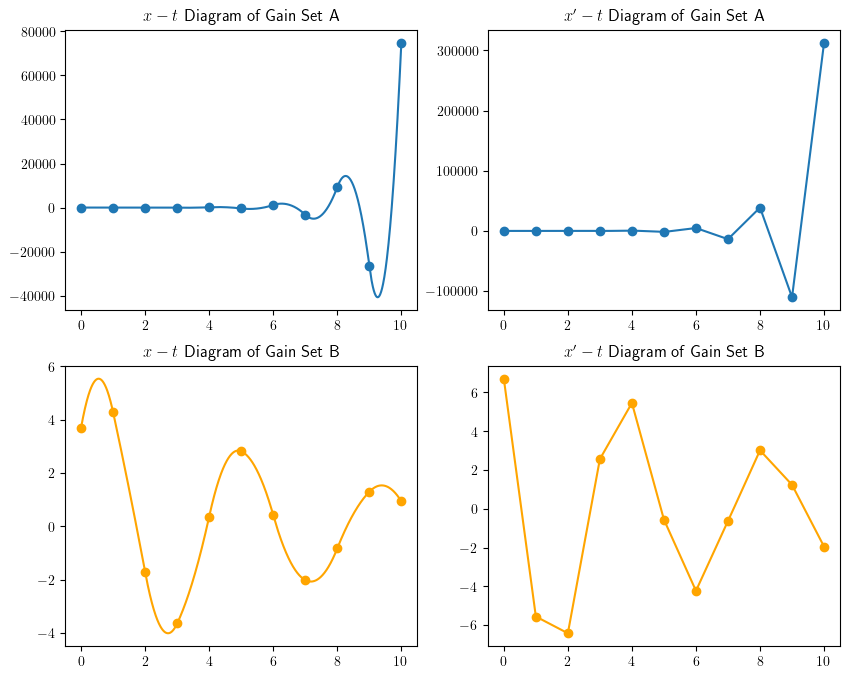

In [34]:
theta_total_GainSetA, _ = Get_Snapshot(TotalTime, GainSetA, InitialState)
theta_total_GainSetB, _ = Get_Snapshot(TotalTime, GainSetB, InitialState)

fig2, ax2 = plt.subplots(2, 2, figsize=(10, 8))

ax2[0, 0].plot(np.arange(0, TotalTime + 0.01, 0.01), theta_total_GainSetA[:, 0])
ax2[0, 0].scatter(np.arange(0, TotalTime + 1), theta_integer_GainSetA[:, 0])
ax2[0, 0].set_title(r"$x-t$ Diagram of Gain Set A")

ax2[0, 1].plot(np.arange(0, TotalTime + 0.01, 0.01), theta_total_GainSetA[:, 1])
ax2[0, 1].scatter(np.arange(0, TotalTime + 1), theta_integer_GainSetA[:, 1])
ax2[0, 1].set_title(r"$x'-t$ Diagram of Gain Set A")

ax2[1, 0].plot(
    np.arange(0, TotalTime + 0.01, 0.01), theta_total_GainSetB[:, 0], c="Orange"
)
ax2[1, 0].scatter(np.arange(0, TotalTime + 1), theta_integer_GainSetB[:, 0], c="Orange")
ax2[1, 0].set_title(r"$x-t$ Diagram of Gain Set B")


ax2[1, 1].plot(
    np.arange(0, TotalTime + 0.01, 0.01), theta_total_GainSetB[:, 1], c="Orange"
)
ax2[1, 1].scatter(np.arange(0, TotalTime + 1), theta_integer_GainSetB[:, 1], c="Orange")
ax2[1, 1].set_title(r"$x'-t$ Diagram of Gain Set B")

plt.show()


可见，数字采样反馈控制系统对应的动力系统，对应的流形维数应该包含广义位移、广义速度，以及输入（或广义加速度）三部分。在本例中，动力系统是一个3维流形，但流形是否光滑需要进一步讨论（其实就是我没学到还在翻资料，应该是不光滑的吧？）。

fSSE和DcfE都能准确地描述系统广义位移、广义速度的演化过程，即动力系统的子流形。（不一定对！）

如果要解析地得到系统稳定条件，必须使用DcfE。


fSSE与DcfE的对比如下

||fSSE|DcfE|
|:-:|:-:|:-:|
|列向量的构成|广义位移、广义速度|广义位移、广义速度、控制力或加速度或其它（*还需消元*）|
|准确描述$x$和$\frac{dx}{dt}$|是|是|
|维数|低|高|
|稳定性对增益约束|不全|全|
|欠驱动问题是否需要消元|否|是（见Habib 2-DoF算例）|
|是否从状态空间方程直接求解|是|否|
